<a href="https://colab.research.google.com/github/Soo321/Hospital-Readmission-Prediction/blob/main/2_Project_Document.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Introduction
Hospital readmission occurs when a patient is readmitted to a hospital within a certain period following their initial discharge, often within 30 days. This measure is a critical indicator of healthcare quality and efficiency, as high readmission rates can suggest issues with patient care or inadequate discharge planning. Analyzing and predicting hospital readmissions is essential for several reasons. By identifying factors that contribute to readmissions, healthcare providers can implement targeted interventions to improve patient outcomes, reduce healthcare costs, and enhance the quality of care. Therefore, this project focuses on understanding the factors that drive readmissions and building predictive models to help hospitals proactively address patient needs post-discharge.

### Goal
1.   Developing the optimal model to predict patient readmission.
2.   Identifying key variables for predicting patient readmission.

## Data
The dataset represents a portion of clinical care data spanning ten years (1999–2008) from 130 U.S. hospitals and integrated delivery networks. The dataset is available at: [Kaggle Dataset - Hospital Readmissions](https://www.kaggle.com/datasets/dubradave/hospital-readmissions). The version hosted on Kaggle has been preprocessed, with unnecessary columns removed and other refinements applied. The original dataset can be accessed through the [UCI Machine Learning Repository](https://archive.ics.uci.edu/dataset/296/diabetes+130-us+hospitals+for+years+1999-2008).

The dataset includes a total of 25,000 rows and 17 columns. Each row represents hospital records of patients diagnosed with diabetes, including details of laboratory tests, medications, and hospital stays of up to 14 days. The descriptions of each column are as follows:

*   "age" - age bracket of the patient
*   "time_in_hospital" - days (from 1 to 14)

* "n_procedures" - number of procedures performed during the hospital stay
* "n_lab_procedures" - number of laboratory procedures performed during the hospital stay
* "n_medications" - number of medications administered during the hospital stay
* "n_outpatient" - number of outpatient visits in the year before a hospital stay
* "n_inpatient" - number of inpatient visits in the year before the hospital stay
* "n_emergency" - number of visits to the emergency room in the year before the hospital stay
* "medical_specialty" - the specialty of the admitting physician
* "diag_1" - primary diagnosis (Circulatory, Respiratory, Digestive, etc.)
* "diag_2" - secondary diagnosis
* "diag_3" - additional secondary diagnosis
* "glucose_test" - whether the glucose serum came out as high (> 200), normal, or not performed
* "A1Ctest" - whether the A1C level of the patient came out as high (> 7%), normal, or not performed
* "change" - whether there was a change in the diabetes medication ('yes' or 'no')
* "diabetes_med" - whether a diabetes medication was prescribed ('yes' or 'no')
* "readmitted" - if the patient was readmitted at the hospital ('yes' or 'no')





In [ ]:
import pandas as pd
import numpy as np

from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/3rd, Fall 2024/Python/Project/hospital_readmissions.csv')

Mounted at /content/drive


In [ ]:
# Check the number of rows and columns of the datset
df.shape

(25000, 17)

In [ ]:
# Display some rows of the dataset to understand its structure
df.head()

,age,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency,medical_specialty,diag_1,diag_2,diag_3,glucose_test,A1Ctest,change,diabetes_med,readmitted
0,[70-80),8,72,1,18,2,0,0,Missing,Circulatory,Respiratory,Other,no,no,no,yes,no
1,[70-80),3,34,2,13,0,0,0,Other,Other,Other,Other,no,no,no,yes,no
2,[50-60),5,45,0,18,0,0,0,Missing,Circulatory,Circulatory,Circulatory,no,no,yes,yes,yes
3,[70-80),2,36,0,12,1,0,0,Missing,Circulatory,Other,Diabetes,no,no,yes,yes,yes
4,[60-70),1,42,0,7,0,0,0,InternalMedicine,Other,Circulatory,Respiratory,no,no,no,yes,no


In [ ]:
# Check the data type of variables
df.dtypes

,0
age,object
time_in_hospital,int64
n_lab_procedures,int64
n_procedures,int64
n_medications,int64
n_outpatient,int64
n_inpatient,int64
n_emergency,int64
medical_specialty,object
diag_1,object


### Exploratory Data Analysis (EDA)
Exploratory Data Analysis (EDA) is a critical step in the data analysis process that involves summarizing and visualizing the main characteristics of a dataset. The primary purpose of EDA is to gain a deeper understanding of the data, identify patterns, detect anomalies, and test hypotheses, all of which help guide subsequent analytical approaches. By laying a solid foundation for further analysis, EDA enhances the overall efficiency and effectiveness of the data science workflow.

Aligned with the objectives of this project, the focus of the EDA was to examine the relationships between features and the target variable. Specifically, I analyzed whether the distributions of individual features exhibited noticeable differences based on readmission status. However, no significant differences were observed. Additionally, I investigated the numerical variables to identify any strong correlations between them but found no such relationships.

In [ ]:
# Check missing values
df.isnull().sum()

,0
age,0
time_in_hospital,0
n_lab_procedures,0
n_procedures,0
n_medications,0
n_outpatient,0
n_inpatient,0
n_emergency,0
medical_specialty,0
diag_1,0


In [ ]:
# Print the descriptive statistics of numerical variables
df.describe()

,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency
count,25000.00000,25000.00000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000
mean,4.45332,43.24076,1.352360,16.252400,0.366400,0.615960,0.186600
std,3.00147,19.81862,1.715179,8.060532,1.195478,1.177951,0.885873
min,1.00000,1.00000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,2.00000,31.00000,0.000000,11.000000,0.000000,0.000000,0.000000
50%,4.00000,44.00000,1.000000,15.000000,0.000000,0.000000,0.000000
75%,6.00000,57.00000,2.000000,20.000000,0.000000,1.000000,0.000000
max,14.00000,113.00000,6.000000,79.000000,33.000000,15.000000,64.000000


<ipython-input-7-f426479db561>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='readmitted', data=df, palette='viridis')


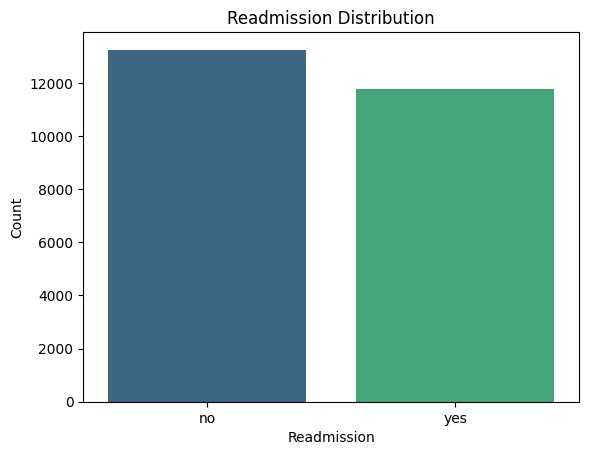

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Check the balance of dataset
sns.countplot(x='readmitted', data=df, palette='viridis')
plt.title("Readmission Distribution")
plt.xlabel("Readmission")
plt.ylabel("Count")
plt.show()

<Axes: >

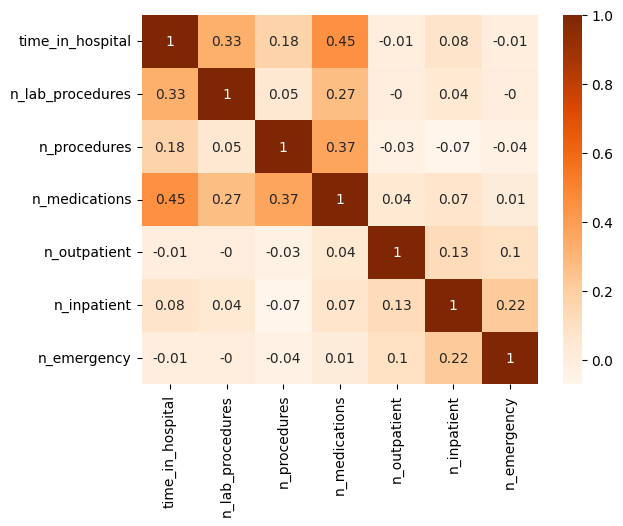

In [ ]:
num_features = ['time_in_hospital', 'n_lab_procedures', 'n_procedures', 'n_medications', 'n_outpatient', 'n_inpatient', 'n_emergency']

# Correlation between numerical variables
corr = df[num_features].corr().round(2)
sns.heatmap(corr, annot = True, cmap = "Oranges")

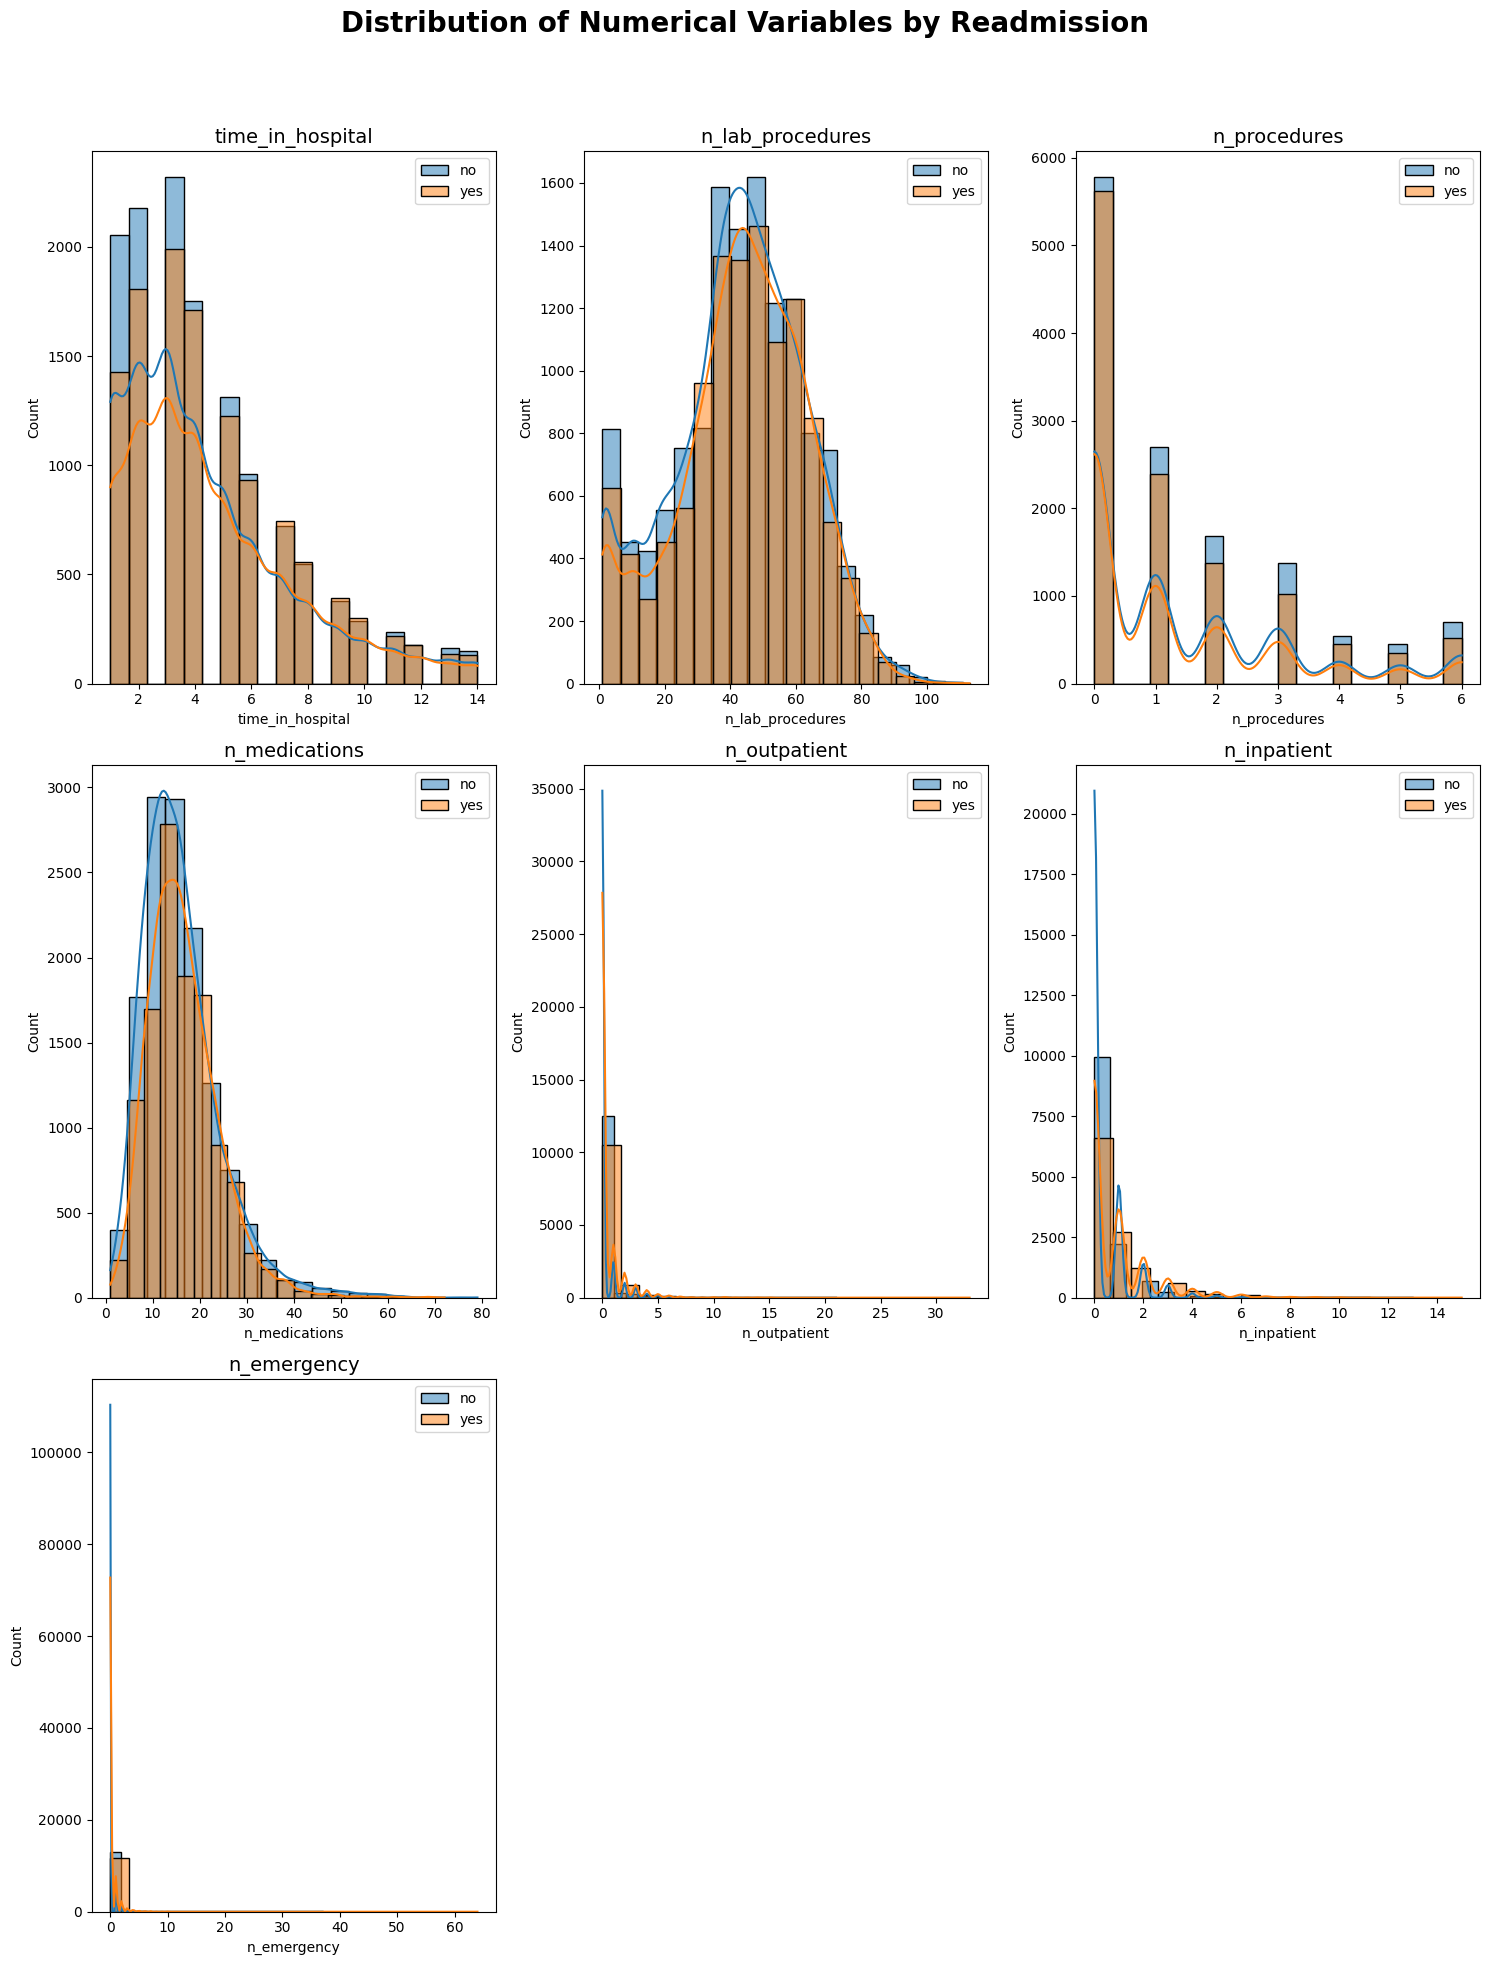

In [ ]:
# Check the distribution of Numerical Variable by Readmission
plt.figure(figsize=(15, 20))
plt.suptitle("Distribution of Numerical Variables by Readmission", fontsize=20, fontweight="bold")

for i, var in enumerate(num_features, 1):
    plt.subplot(3, 3, i)
    for readmitted_value in df['readmitted'].unique():
        sns.histplot(df[df['readmitted'] == readmitted_value][var], kde=True, label=f'{readmitted_value}', bins=20)
    plt.title(f'{var}', fontsize=14)
    plt.legend()

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

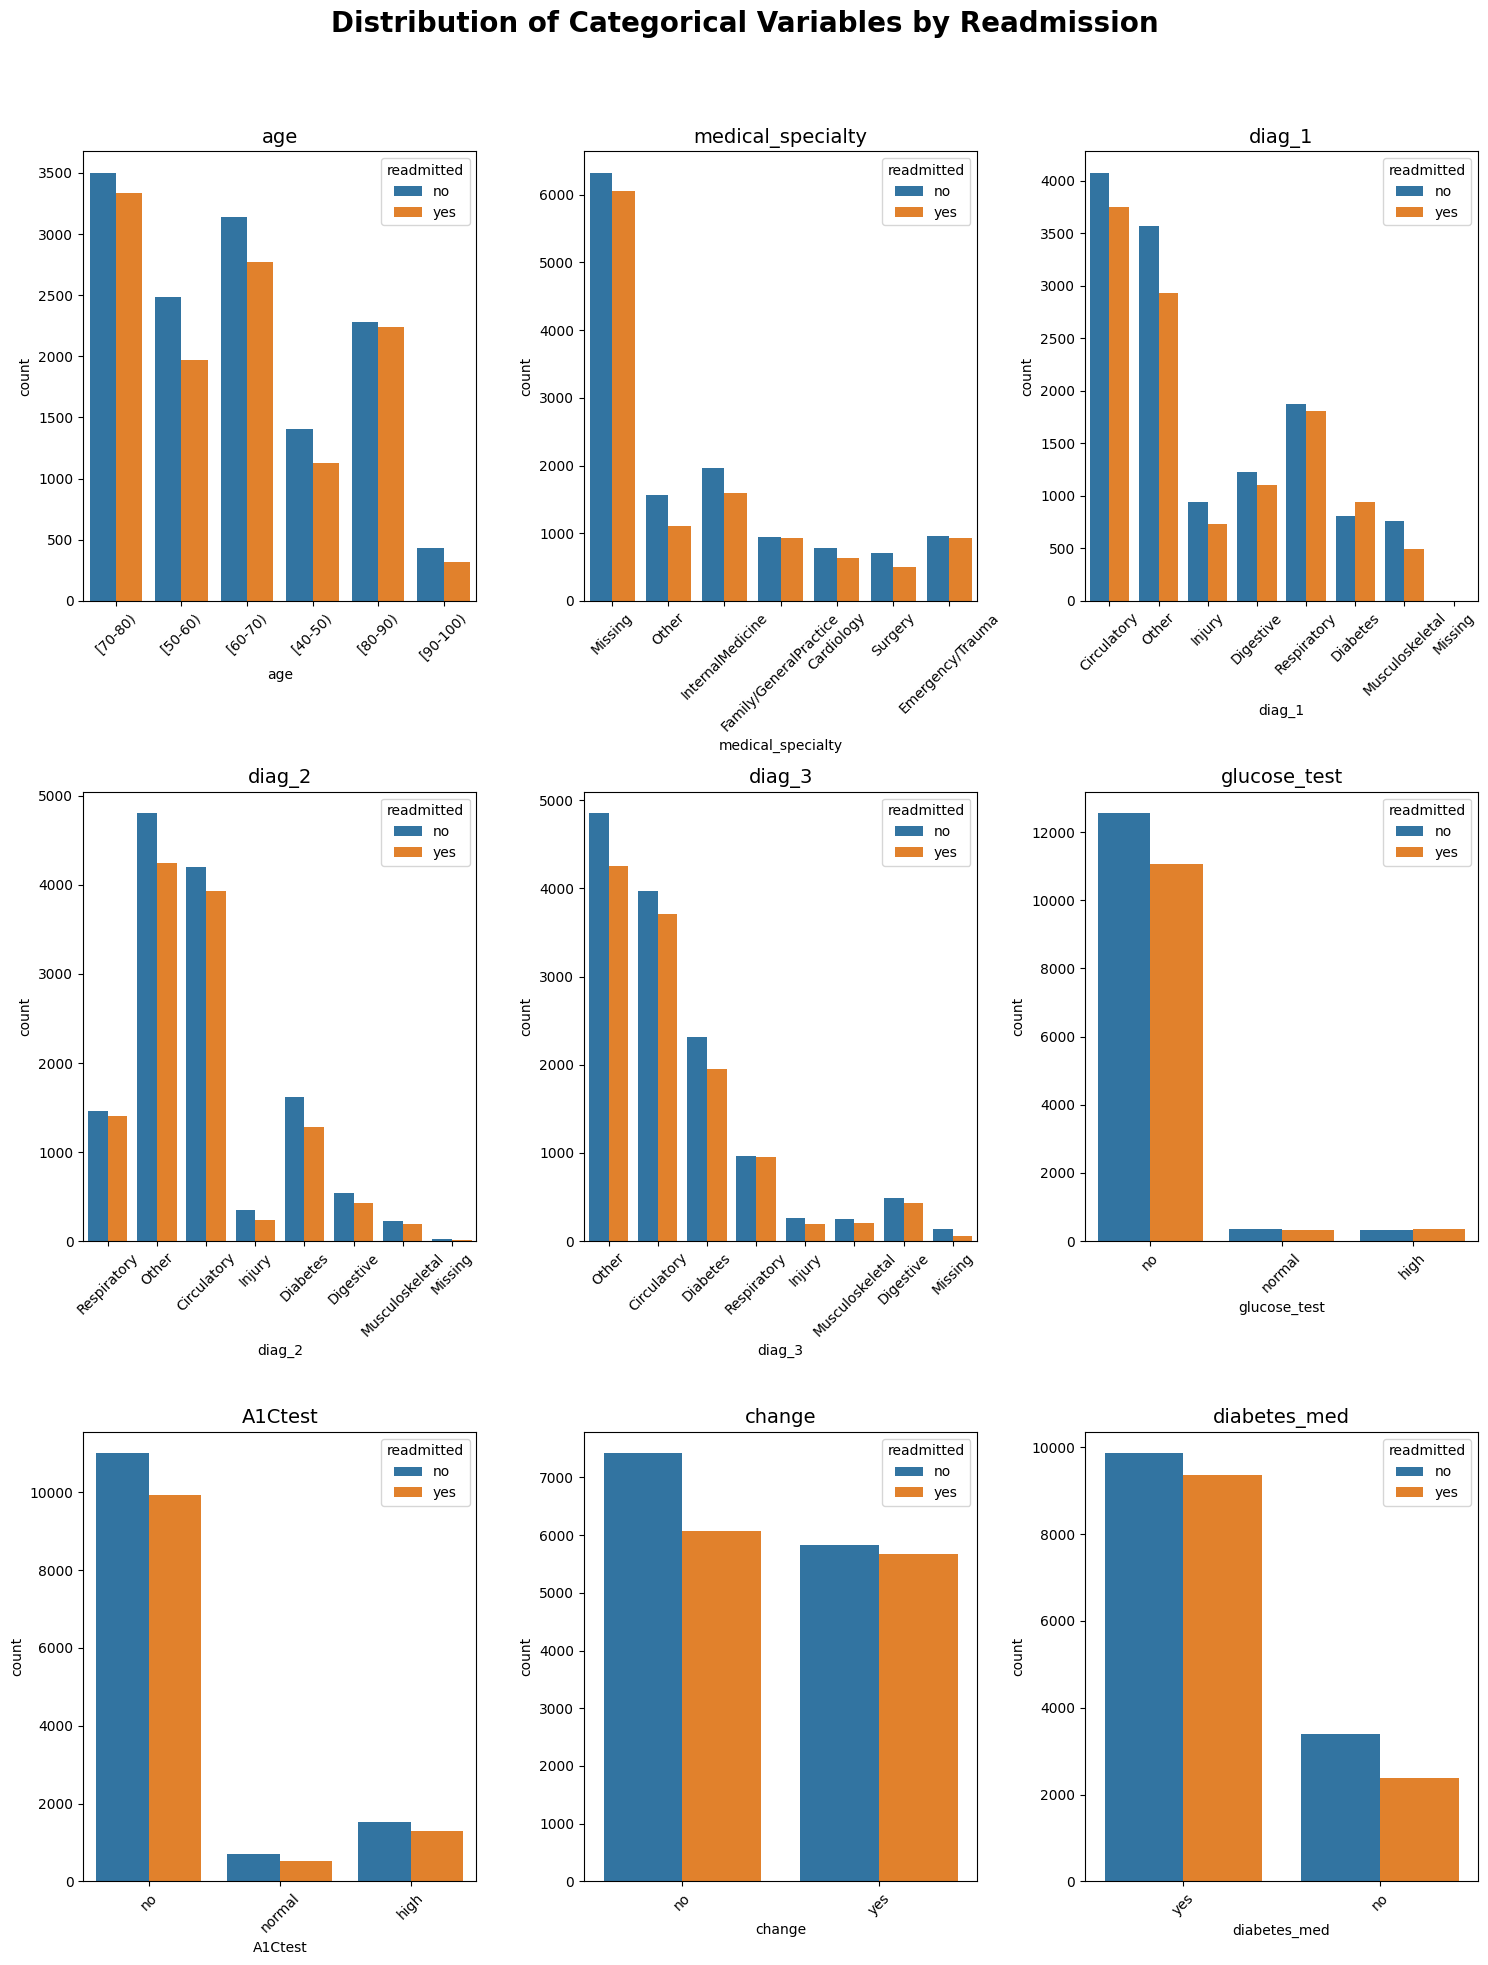

In [ ]:
category_features = ['age', 'medical_specialty', 'diag_1', 'diag_2', 'diag_3', 'glucose_test', 'A1Ctest', 'change', 'diabetes_med']

# Check the distribution of Categorical Variable by Readmission
plt.figure(figsize=(15, 20))
plt.suptitle("Distribution of Categorical Variables by Readmission", fontsize=20, fontweight="bold")

for i, var in enumerate(category_features, 1):
    plt.subplot(3, 3, i)
    sns.countplot(x=var, hue='readmitted', data=df)
    plt.title(f'{var}', fontsize=14)
    plt.xticks(rotation=45)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

## Model Building

### Feature Engineering
Before building the model, the following three preprocessing steps were performed:

1. **Label Encoding**: This process was used to convert categorical variables into numerical formats, making them suitable for machine learning algorithms that require numeric input. Each unique category was assigned a corresponding numeric value. This step is essential to ensure that the model can process and interpret categorical data effectively.

2. **Data Splitting**: The dataset was divided into training and test sets to evaluate the model’s performance. Splitting the data helps to avoid overfitting and ensures that the model performs well on unseen data. In this project, the split ratio is defined as 75% for training and 25% for testing.

3. **Feature Scaling**: This step is a crucial preprocessing step in machine learning that transforms the features in the dataset to a specific range or distribution. This ensures that all features contribute equally to the model training process, particularly in distance-based algorithms or gradient-based optimization methods. Without scaling, features with larger ranges could disproportionately influence the model, leading to suboptimal performance.

  There are three common types of feature scaling: min-max normalization, mean normalization, and standardization. In this project, standardization was used to scale the features.

In [ ]:
# Label encoding
from sklearn.preprocessing import LabelEncoder
label_encoder_age = LabelEncoder()
label_encoder_medical_specialty = LabelEncoder()
label_encoder_diag_1 = LabelEncoder()
label_encoder_diag_2 = LabelEncoder()
label_encoder_diag_3 = LabelEncoder()
label_encoder_glucose_test = LabelEncoder()
label_encoder_A1Ctest = LabelEncoder()
label_encoder_diabetes_med = LabelEncoder()
label_encoder_readmitted = LabelEncoder()
label_encoder_change = LabelEncoder()

df['age'] = label_encoder_age.fit_transform(df['age'])
df['medical_specialty'] = label_encoder_medical_specialty.fit_transform(df['medical_specialty'])
df['diag_1'] = label_encoder_diag_1.fit_transform(df['diag_1'])
df['diag_2'] = label_encoder_diag_2.fit_transform(df['diag_2'])
df['diag_3'] = label_encoder_diag_3.fit_transform(df['diag_3'])
df['glucose_test'] = label_encoder_glucose_test.fit_transform(df['glucose_test'])
df['A1Ctest'] = label_encoder_A1Ctest.fit_transform(df['A1Ctest'])
df['diabetes_med'] = label_encoder_diabetes_med.fit_transform(df['diabetes_med'])
df['readmitted'] = label_encoder_readmitted.fit_transform(df['readmitted'])
df['change'] = label_encoder_change.fit_transform(df['change'])

# Separate into features and target
X = df.drop('readmitted', axis = 1)
X = X.values
y = df['readmitted']

# Split the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

# Feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Logistic Regression
Grid search was applied to determine the optimal metrics for the logistic regression model. The results indicated that the highest cross-validation accuracy was achieved when no regularization was applied. Using the best parameters identified through grid search, the model was built and subsequently evaluated on the test set.

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Define the parameter grid
param_grid = {
    'penalty': ['l1', 'l2', None],
    'C': [0.01, 0.1, 0.25, 0.75, 1, 10]
}

model = LogisticRegression(random_state=0, max_iter=1000)

# Create the GridSearchCV object
grid_search = GridSearchCV(
    estimator = model,
    param_grid = param_grid,
    scoring = 'accuracy',
    cv = 10,
    n_jobs = -1
)

# Fit the model to the training data
grid_search.fit(X_train, y_train)

# Display the best parameters and the best score
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation accuracy:", grid_search.best_score_)

# Use the best estimator to make predictions
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Print confusion matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix:\n', cm, '\n')

# Print classification report
report = classification_report(y_test, y_pred)
print('Classification report:\n', report)

# Print test accuracy
score_logistic = accuracy_score(y_test, y_pred)
print('Test accuracy:', score_logistic)


Best parameters: {'C': 0.01, 'penalty': None}
Best cross-validation accuracy: 0.6086933333333333
Confusion matrix:
 [[2591  616]
 [1901 1142]] 

Classification report:
               precision    recall  f1-score   support

           0       0.58      0.81      0.67      3207
           1       0.65      0.38      0.48      3043

    accuracy                           0.60      6250
   macro avg       0.61      0.59      0.57      6250
weighted avg       0.61      0.60      0.58      6250

Test accuracy: 0.59728


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
60 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1194, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/u

### Naive Bayes


In [ ]:
from sklearn.naive_bayes import GaussianNB

# Train the model on the training set
naive_bayes = GaussianNB()
naive_bayes.fit(X_train, y_train)

# Make predictions
y_pred = naive_bayes.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix:\n', cm, '\n')

report = classification_report(y_test, y_pred, labels=[1, 0])
print('Classification report:\n', report)

score_naive_gaussian = accuracy_score(y_test, y_pred)
print('Accuracy:', score_naive_gaussian)

Confusion matrix:
 [[2801  406]
 [2244  799]] 

Classification report:
               precision    recall  f1-score   support

           1       0.66      0.26      0.38      3043
           0       0.56      0.87      0.68      3207

    accuracy                           0.58      6250
   macro avg       0.61      0.57      0.53      6250
weighted avg       0.61      0.58      0.53      6250

Accuracy: 0.576


### Decision Tree
Similar to the logistic model, grid search was employed to identify the best metrics for the decision tree model. The results showed that the highest cross-validation accuracy was achieved when the minimum number of samples required to split an internal node was 2, the maximum depth of the tree was 4, and the minimum number of samples required to be at a leaf node was 1.

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Apply GridSearch to find the best metrics
values_grid = {'min_samples_split': [2, 3, 4, 5, 6, 7],
               'max_depth': [3, 4, 5, 6, 7, 9, 11],
               'criterion': ['entropy', 'gini'],
               'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7]}

model = DecisionTreeClassifier()

gridDecisionTree = GridSearchCV(
    estimator = model,
    param_grid = values_grid,
    scoring='accuracy',
    cv = 10)

gridDecisionTree.fit(X_train, y_train)

# Display the best parameters and the best score
print("Best parameters:", gridDecisionTree.best_params_)
print("Best cross-validation accuracy:", gridDecisionTree.best_score_)

Best parameters: {'criterion': 'entropy', 'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best cross-validation accuracy: 0.61136


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


In [ ]:
# Train the model on the training set
decision_tree = DecisionTreeClassifier(criterion = 'entropy',
                                       max_depth= 4,
                                       min_samples_split=2,
                                       min_samples_leaf=1,
                                       random_state=0)
decision_tree.fit(X_train, y_train)

y_pred = decision_tree.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix:\n', cm, '\n')

report = classification_report(y_test, y_pred, labels=[1, 0])
print('Classification report:\n', report)

score_naive_gaussian = accuracy_score(y_test, y_pred)
print('Accuracy:', score_naive_gaussian)

Confusion matrix:
 [[2269  938]
 [1540 1503]] 

Classification report:
               precision    recall  f1-score   support

           1       0.62      0.49      0.55      3043
           0       0.60      0.71      0.65      3207

    accuracy                           0.60      6250
   macro avg       0.61      0.60      0.60      6250
weighted avg       0.61      0.60      0.60      6250

Accuracy: 0.60352


Additionally, the most important variables of the model were examined.

In [ ]:
from sklearn.metrics import f1_score

ser = pd.Series(decision_tree.feature_importances_, index = df.drop('readmitted', axis = 1).columns)

top15 = ser.sort_values(ascending=False)[:15]

print(top15)

n_inpatient          0.753528
n_outpatient         0.095870
diabetes_med         0.039206
n_emergency          0.035676
age                  0.030956
n_lab_procedures     0.025260
time_in_hospital     0.010933
diag_1               0.008571
n_procedures         0.000000
n_medications        0.000000
medical_specialty    0.000000
diag_2               0.000000
diag_3               0.000000
glucose_test         0.000000
A1Ctest              0.000000
dtype: float64


### Random Forest
GridSearch was also performed for the random forest model. The results showed that the highest cross-validation accuracy was achieved when the number of trees was 100, the maximum depth of the tree was 15, and the minimum number of samples required to split an internal node was 7.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

values_grid = {'n_estimators': [100],
               'min_samples_split': [2, 3, 4, 5, 6, 7],
               'max_depth': [6, 7, 9, 11, 13, 15],
               'criterion': ['entropy', 'gini']}

model = RandomForestClassifier()

gridRandomForest = GridSearchCV(
    estimator = model,
    param_grid = values_grid,
    scoring='accuracy',
    cv = 10)

gridRandomForest.fit(X_train, y_train)

# Display the best parameters and the best score
print("Best parameters:", gridRandomForest.best_params_)
print("Best cross-validation accuracy:", gridRandomForest.best_score_)

Best parameters: {'criterion': 'entropy', 'max_depth': 15, 'min_samples_split': 7, 'n_estimators': 100}
Best cross-validation accuracy: 0.6205866666666666


In [ ]:
random_forest = RandomForestClassifier(n_estimators = 100,
                                       min_samples_split = 7,
                                       max_depth= 15,
                                       criterion = 'entropy',
                                       random_state = 0)
random_forest.fit(X_train, y_train)

y_pred = random_forest.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix:\n', cm, '\n')

report = classification_report(y_test, y_pred, labels=[1, 0])
print('Classification report:\n', report)

score_naive_gaussian = accuracy_score(y_test, y_pred)
print('Accuracy:', score_naive_gaussian)

Confusion matrix:
 [[2334  873]
 [1601 1442]] 

Classification report:
               precision    recall  f1-score   support

           1       0.62      0.47      0.54      3043
           0       0.59      0.73      0.65      3207

    accuracy                           0.60      6250
   macro avg       0.61      0.60      0.60      6250
weighted avg       0.61      0.60      0.60      6250

Accuracy: 0.60416


Additionally, an analysis of the most important variables in the model was conducted.

In [ ]:
ser = pd.Series(random_forest.feature_importances_, index = df.drop('readmitted', axis = 1).columns)

top15 = ser.sort_values(ascending=False)[:15]

print(top15)

n_lab_procedures     0.155685
n_medications        0.133728
n_inpatient          0.105367
time_in_hospital     0.088205
age                  0.064173
medical_specialty    0.064009
diag_1               0.059970
n_procedures         0.058551
diag_3               0.058267
diag_2               0.055850
n_outpatient         0.043752
n_emergency          0.032359
A1Ctest              0.027737
glucose_test         0.020174
change               0.016496
dtype: float64


### K-Nearest Neighbors (KNN)
For the final model, KNN, grid search revealed that the highest cross-validation accuracy was achieved when the number of neighbors was set to 55.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

n_neighbors = np.array(range(1,70,2))
values_grid = {'n_neighbors': n_neighbors, 'weights': ['uniform', 'distance']}

model = KNeighborsClassifier()

gridKNN = GridSearchCV(
    estimator = model,
    param_grid = values_grid,
    scoring='accuracy',
    cv = 10)

gridKNN.fit(X_train, y_train)

# Display the best parameters and the best score
print("Best parameters:", gridKNN.best_params_)
print("Best cross-validation accuracy:", gridKNN.best_score_)

Best parameters: {'n_neighbors': 55, 'weights': 'uniform'}
Best cross-validation accuracy: 0.6033600000000001


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


In [ ]:
KNN = KNeighborsClassifier(n_neighbors = 55, weights='uniform')
KNN.fit(X_train, y_train)

y_pred = KNN.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix:\n', cm, '\n')

report = classification_report(y_test, y_pred, labels=[1, 0])
print('Classification report:\n', report)

score_naive_gaussian = accuracy_score(y_test, y_pred)
print('Accuracy:', score_naive_gaussian)

Confusion matrix:
 [[2488  719]
 [1927 1116]] 

Classification report:
               precision    recall  f1-score   support

           1       0.61      0.37      0.46      3043
           0       0.56      0.78      0.65      3207

    accuracy                           0.58      6250
   macro avg       0.59      0.57      0.56      6250
weighted avg       0.59      0.58      0.56      6250

Accuracy: 0.57664


### Result
The test accuracies for Logistic Regression, Naive Bayes, Decision Tree, Random Forest, and KNN were as follows: 0.60, 0.58, 0.60, 0.60, and 0.58, respectively.

Additionally, feature importance was analyzed for both the Decision Tree and Random Forest models.
* Decision Tree revealed the following variables in order of importance: `n_inpatient`, `n_outpatient`, `diabetes_med`, `n_emergency`, `age`, `n_lab_procedures`, `time_in_hospital`, and `diag_1`. Notably, the importance of `n_inpatient` was found to be more than seven times higher than that of `n_outpatient`. Among the 8 features not mentioned, their importance was reported as 0.

* Random Forest, unlike Decision Tree, did not have any features with zero importance. While no overwhelmingly dominant feature was identified, the following features showed high importance in descending order: `n_lab_procedures`, `n_medications`, `n_inpatient`, `time_in_hospital`, `age`, `medical_specialty`, `diag_1`, `n_procedures`, `diag_3`, `diag_2`, `n_outpatient`, `n_emergency`, `A1Ctest`, `glucose_test`, and `chage`.

## Conclusion
In this project, the goal was to develop a model for predicting patient readmission. After evaluating five machine learning models, Decision Tree and Random Forest achieved the highest accuracy of 60%. The accuracy of the other models was 58%, showing only minor differences. The choice of the best model can vary depending on the goals and constraints of the analysis. Overall, Random Forest emerges as a reasonable choice for predicting patient readmission.

Furthermore, by considering the feature importance of Decision Tree and Random Forest collectively, `n_lab_procedures`, `n_inpatient`, and `age` can be identified as key features for predicting patient readmission.